<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Deep-Learning/blob/main/P08_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No. 08**

Implement autoencoders for dimensionality reduction or feature learning

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0897 - val_loss: 0.0299
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0265 - val_loss: 0.0187
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0181 - val_loss: 0.0149
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0148 - val_loss: 0.0125
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0125 - val_loss: 0.0111
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0088 - val_loss: 0.0082
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0078 - val_los

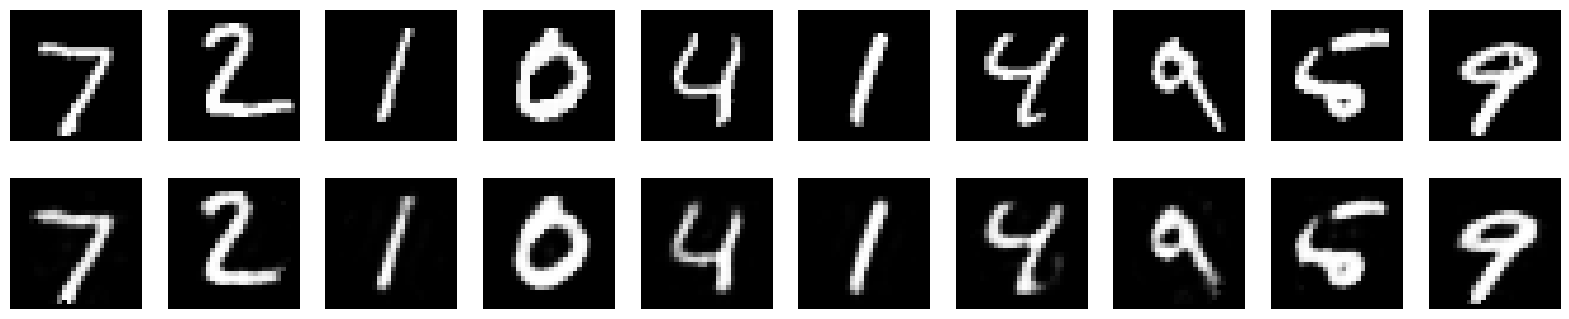

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Step 1: Load and preprocess the data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

# Step 2: Define autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 64  # Dimension of the encoded representation

input_layer = Input(shape=(input_dim,))
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model (for feature extraction)
encoder = Model(input_layer, encoded)

# Step 3: Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Step 5: Encode test data
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Step 6: Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
